In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/covid19.json")

In [2]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,None,None,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,None,None,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,None,None,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,None,None,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,None,None,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      0 non-null      object 
 7   retweet_count       0 non-null      object 
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  1518 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 765.6

In [4]:
tweets_df.isna().sum()

created_at               0
source                   0
original_text            0
polarity                 0
subjectivity             0
lang                     0
favorite_count        6532
retweet_count         6532
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    5014
hashtags                 0
user_mentions            0
place                 2444
dtype: int64

In [5]:
from clean_tweets_dataframe import Clean_Tweets

In [14]:
# remove "possibly_sensitive" column
clean_tweets = Clean_Tweets(tweets_df)
tweets_df = clean_tweets.drop_unwanted_column(tweets_df, ["possibly_sensitive"])
tweets_df.columns

Automation in Action...!!!


Index(['created_at', 'source', 'polarity', 'subjectivity', 'lang',
       'favorite_count', 'retweet_count', 'original_author', 'followers_count',
       'friends_count', 'hashtags', 'user_mentions', 'place'],
      dtype='object')

In [15]:
# shape of tweets_df
tweets_df.shape

(6532, 13)

In [16]:
tweets_df = clean_tweets.drop_duplicate(tweets_df)
tweets_df.shape

(6532, 13)

There were no duplicate rows.

In [17]:
#Convert to datetime
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6532 entries, 0 to 6531
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       6532 non-null   datetime64[ns, UTC]
 1   source           6532 non-null   object             
 2   polarity         6532 non-null   float64            
 3   subjectivity     6532 non-null   float64            
 4   lang             6532 non-null   object             
 5   favorite_count   0 non-null      object             
 6   retweet_count    0 non-null      object             
 7   original_author  6532 non-null   object             
 8   followers_count  6532 non-null   int64              
 9   friends_count    6532 non-null   int64              
 10  hashtags         6532 non-null   object             
 11  user_mentions    6532 non-null   object             
 12  place            4088 non-null   object             
dtypes: datetime64[ns, 

<h2>pointing out tweets that are not english<h2>

In [18]:
tweets_df.shape

(6532, 13)

In [19]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(6532, 13)

There are no non-english tweets.

In [21]:
# remove non-alphabetic characters
tweets_df["clean_text"] = tweets_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")
tweets_df["clean_text"] = tweets_df["clean_text"].str.replace("\n", "\s")
tweets_df[["original_text", "clean_text"]]

KeyError: 'original_text'

<h2>Save pre-processed data<h2>

In [22]:
tweets_df.to_csv("../data/processed_tweets.csv")

<h1>Data Exploration<h1>

<h2>Basic info<h2>

In [23]:
tweets_df = pd.read_csv("../data/processed_tweets.csv")

In [24]:
# shape of dataframe
tweets_df.shape

(6532, 14)

In [25]:
# general info about null values, data types, columns
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6532 non-null   int64  
 1   created_at       6532 non-null   object 
 2   source           6532 non-null   object 
 3   polarity         6532 non-null   float64
 4   subjectivity     6532 non-null   float64
 5   lang             6532 non-null   object 
 6   favorite_count   0 non-null      float64
 7   retweet_count    0 non-null      float64
 8   original_author  6532 non-null   object 
 9   followers_count  6532 non-null   int64  
 10  friends_count    6532 non-null   int64  
 11  hashtags         6532 non-null   object 
 12  user_mentions    6532 non-null   object 
 13  place            4088 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 714.6+ KB


In [26]:
# stats about numerical columns
tweets_df.describe()

,Unnamed: 0,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,6532.000000,6532.000000,6532.000000,0.0,0.0,6.532000e+03,6532.000000
mean,3265.500000,0.041399,0.380125,NaN,NaN,1.649915e+04,1707.652021
std,1885.770311,0.323983,0.349213,NaN,NaN,2.597877e+05,5148.761957
min,0.000000,-1.000000,0.000000,NaN,NaN,0.000000e+00,0.000000
25%,1632.750000,0.000000,0.000000,NaN,NaN,8.900000e+01,162.000000
50%,3265.500000,0.000000,0.400000,NaN,NaN,4.545000e+02,560.500000
75%,4898.250000,0.175000,0.633333,NaN,NaN,1.769000e+03,1765.000000
max,6531.000000,1.000000,1.000000,NaN,NaN,1.366658e+07,237298.000000


<h2>Location<h2>

In [27]:
tweets_df.place.value_counts()

United States                     53
South Africa                      53
Malaysia                          45
കേരളം                             45
Canada                            44
                                  ..
Liverpool, England.                1
http://goo.gl/QIQfcL               1
US: 3.222483,101.729662            1
İzmir, Türkiye                     1
Dreamland reality is overrated     1
Name: place, Length: 2256, dtype: int64

C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Abreham\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 3349 mi

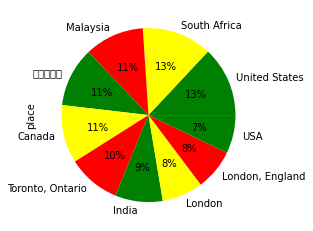

In [44]:
# top 10 locations of users
top_locations = tweets_df.place.value_counts().head(10)
top_locations.plot(kind="pie",autopct='%1.0f%%',colors=["green", "yellow", "red"]);

<h2>Sentiments<h2>

In [29]:
def text_category(p):
    """
    converts polarity into sentiment category
    """
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

In [30]:
tweets_df["sentiment"] = tweets_df["polarity"].apply(text_category)
tweets_df["sentiment"].value_counts()

positive    2808
neutral     2508
negative    1216
Name: sentiment, dtype: int64

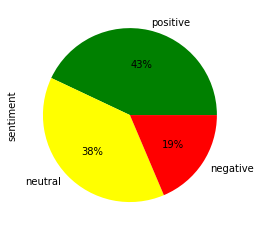

In [42]:
tweets_df["sentiment"].value_counts().plot(kind="pie",autopct='%1.0f%%',colors=["green", "yellow", "red"]);

<h2>Hashtags<h2>

In [32]:
import re
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', str(tweet))

In [33]:
tweets_df['hashtags'] = tweets_df.clean_text.apply(find_hashtags)
tweets_df['hashtags']

AttributeError: 'DataFrame' object has no attribute 'clean_text'

In [34]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
    tweets_df.hashtags.apply(
        lambda hashtags_list: hashtags_list != []
    ), ['hashtags']]
hashtags_list_df[:10]

,hashtags
0,[]
1,[]
2,"[{'text': 'red4research', 'indices': [103, 116]}]"
3,[]
4,[]
5,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},..."
6,[]
7,[]
8,[]
9,"[{'text': 'Covid19', 'indices': [120, 128]}]"


In [35]:
#create dataframe where each use of hashtag gets its own row and make the hashtags lowercase
flattened_hashtags_df = pd.DataFrame(
    [hashtag.lower() for hashtags_list in hashtags_list_df.hashtags
     for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df[:10]

,hashtag
0,[
1,]
2,[
3,]
4,[
5,{
6,'
7,t
8,e
9,x


In [36]:
flattened_hashtags_df.value_counts()

hashtag
'          24840
           18045
i          12312
]          10672
[          10672
,           9765
e           9669
t           9158
:           8280
c           7935
d           7021
1           6172
n           5700
s           5294
x           4188
}           4140
{           4140
9           3769
o           3380
v           3055
2           2384
a           2333
3           1962
4           1723
0           1621
5           1593
6           1392
8           1352
7           1244
r           1082
u            500
l            484
h            364
m            241
w            234
f            233
p            219
g            217
b            149
y            102
k             79
z             48
_             37
j             24
q             21
ا             18
ل             17
ي             10
ت              5
ط              5
ع              5
م              5
ج              4
ر              4
ب              4
ق              1
ة              1
و              1
dtype:

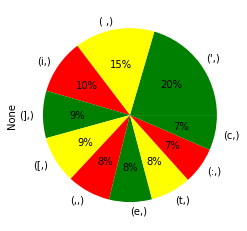

In [41]:
flattened_hashtags_df.value_counts().head(10).plot(kind="pie",autopct='%1.0f%%',colors=["green", "yellow", "red"]);

<h2>Original authors<h2>

In [38]:
tweets_df.original_author.value_counts()

PuneUpdater        530
viralvideovlogs     45
Signal__Pump        27
WHO__India          27
Rosenchild          11
                  ... 
ljenkinsmidwife      1
CaleEuropaEdic       1
primate7             1
MainPerth            1
siminicee            1
Name: original_author, Length: 5248, dtype: int64

PuneUpdater is the original author of around 10% of the tweets.

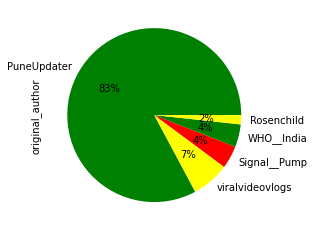

In [40]:
tweets_df.original_author.value_counts().head(5).plot(kind="pie",autopct='%1.0f%%',colors=["green", "yellow", "red"]);